In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

In [3]:
#Convertimos datetime en indice
wind_ava = wind_ava.set_index('datetime')

In [4]:
# Convertirmos el indice en objeto tiempo
wind_ava.index = pd.to_datetime(wind_ava.index)

In [5]:
for c in wind_ava.columns:
    if not c.endswith('.13') and c != 'energy':
        wind_ava.drop(c, axis = 1, inplace=True)

## DATASET

In [6]:
wind_ava

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


In [7]:
X = wind_ava.drop(columns=['energy'])
y = wind_ava['energy']

# SPLIT

In [8]:
X_train = X.loc[:'2009-03-03']
y_train = y.loc[:'2009-03-03']

X_test = X.loc['2009-03-04':]
y_test = y.loc['2009-03-04':]

In [9]:
X_train

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-02-24 00:00:00,2.466893e+06,19.370060,0.000000,1.227631e+06,2.385956,2.453854,0.616428,0.865628,97914.485585,282.814800,...,284.041069,283.471287,282.240806,0.033773,0.081090,282.709850,0.410712,-5.929224,2.533687,3.353960
2008-02-24 06:00:00,2.458941e+06,20.859243,17.809416,1.104303e+06,2.387473,2.454267,0.129590,0.402165,97834.193324,282.514650,...,282.631601,283.084260,282.284231,0.003857,0.019154,282.707725,0.414566,-5.879858,1.326827,1.044971
2008-02-24 12:00:00,2.461805e+06,21.490690,9.852017,6.612880e+05,2.388885,2.454614,-1.654745,0.352099,97965.730567,284.013881,...,284.997036,283.030517,282.315762,-0.062917,0.035643,282.705021,0.424874,-5.689764,-2.036895,0.715686


In [10]:
X_test

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2009-03-05 12:00:00,2.411255e+06,10.505421,2.273542,9.666385e+06,2.445820,2.468591,5.111827,-7.908876,96892.122835,281.026572,...,280.950499,280.073879,280.970975,0.912900,-1.280752,281.491062,0.416409,-5.881434,7.184308,-10.838239
2009-03-05 18:00:00,2.424548e+06,13.821869,1.515695,9.366030e+06,2.447363,2.468937,4.315586,-4.856905,97197.309532,281.096540,...,280.260920,280.720728,280.959635,0.611511,-0.674134,281.488937,0.416948,-5.864654,6.562830,-7.670114
2009-03-06 00:00:00,2.439200e+06,17.508242,1.402018,7.408533e+06,2.448853,2.469339,2.649172,-1.331388,97346.858624,279.776283,...,279.769530,280.538234,280.956592,0.199549,-0.167948,281.485846,0.425721,-5.725873,4.395505,-3.332029
2009-03-06 06:00:00,2.449285e+06,21.188517,31.640132,5.469472e+06,2.450396,2.469697,3.026592,-0.421498,97408.251126,280.021169,...,280.604835,280.368499,280.944976,0.203268,-0.128020,281.482948,0.428183,-5.689463,4.967808,-2.258858
2009-03-06 12:00:00,2.465311e+06,22.895861,3.069282,4.140428e+06,2.451939,2.470043,4.557711,-3.029477,97643.166240,281.388071,...,283.342747,280.544034,280.934465,0.549779,-0.523689,281.480437,0.428149,-5.704852,6.703552,-5.073250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,281.680110,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,282.842686,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,282.027412,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


In [11]:
y_train

datetime
2005-01-02 18:00:00     402.71
2005-01-03 00:00:00     696.80
2005-01-03 06:00:00    1591.15
2005-01-03 12:00:00    1338.62
2005-01-03 18:00:00     562.50
                        ...   
2008-02-24 00:00:00      64.34
2008-02-24 06:00:00      14.95
2008-02-24 12:00:00     171.21
2008-02-25 06:00:00       2.35
2008-02-25 18:00:00      46.62
Name: energy, Length: 3827, dtype: float64

In [12]:
y_test

datetime
2009-03-05 12:00:00     977.91
2009-03-05 18:00:00    1191.99
2009-03-06 00:00:00     795.88
2009-03-06 06:00:00     141.05
2009-03-06 12:00:00    1124.20
                        ...   
2009-12-30 06:00:00    1280.13
2009-12-30 12:00:00     855.00
2009-12-30 18:00:00     117.06
2009-12-31 12:00:00     516.96
2009-12-31 18:00:00     867.07
Name: energy, Length: 921, dtype: float64

# PREPROCESADO

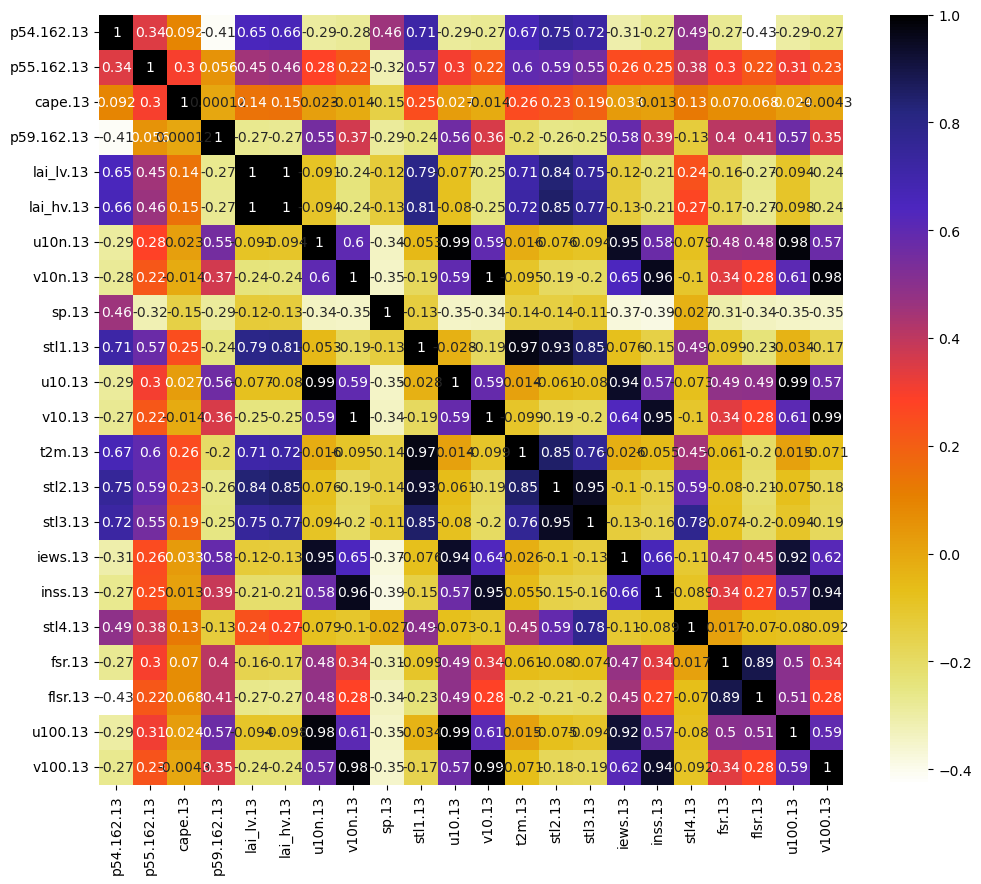

In [13]:
import seaborn as sns

plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.95)
len(set(corr_features))

7

In [16]:
X_train.shape

(3827, 22)

In [17]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [18]:
X_train.shape

(3827, 15)

# Método de escalado

## 1. Por omisión

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score

scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]

results = {}
for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    knn = KNeighborsRegressor()
    
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    results[type(scaler).__name__] = r2

print("Resultados:")
for scaler, r2 in results.items():
    print(f"Método de escalado: {scaler}, R^2: {r2}")


Resultados:
Método de escalado: StandardScaler, R^2: 0.5262014538394686
Método de escalado: MinMaxScaler, R^2: 0.39583074546640773
Método de escalado: RobustScaler, R^2: 0.5328928553269852


In [22]:
results

{'StandardScaler': 0.5262014538394686,
 'MinMaxScaler': 0.39583074546640773,
 'RobustScaler': 0.5328928553269852}

In [23]:
X_train.shape

(3827, 15)

## Con HPO

In [24]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

inner_tss = TimeSeriesSplit(n_splits=4)

inner_scores = {}

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

best_scores = {}

param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

pipeline_std = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Definir GridSearchCV para StandardScaler
grid_std = GridSearchCV(pipeline_std, 
                        param_grid, 
                        scoring='r2',
                        cv=inner_tss)

grid_std.fit(X_train, y_train)
best_scores['StandardScaler'] = grid_std.best_score_

pipeline_min_max = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor())
])

# Definir GridSearchCV para MinMaxScaler
grid_min_max = GridSearchCV(pipeline_min_max, 
                           param_grid, 
                           scoring='r2',
                           cv=inner_tss)

grid_min_max.fit(X_train, y_train)
best_scores['MinMaxScaler'] = grid_min_max.best_score_

pipeline_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', KNeighborsRegressor())
])

# Definir GridSearchCV para RobustScaler
grid_robust = GridSearchCV(pipeline_robust, 
                           param_grid, 
                           scoring='r2', 
                           cv=inner_tss)
                           
grid_robust.fit(X_train, y_train)
best_scores['RobustScaler'] = grid_robust.best_score_

# Definir GridSearchCV para KNN sin scaler
param_grid_b = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
                           
grid_knn = GridSearchCV(KNeighborsRegressor(), 
                        param_grid_b, 
                        scoring='r2', 
                        cv=inner_tss)
                           
grid_knn.fit(X_train, y_train)
best_scores['KNN'] = grid_knn.best_score_

# Mostrar los resultados
for name, score in best_scores.items():
    print(f"{name}: {score}")

StandardScaler: 0.5379947543773274
MinMaxScaler: 0.44872910063688787
RobustScaler: 0.5336837704532872
KNN: 0.18860883013688512


# EVALUACIÓN DE MODELOS

## Por omisión

In [26]:
X_train.shape

(3827, 15)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import time
from sklearn.pipeline import Pipeline

scores = {}

# MODELO 1: KNN
pipeline_knn_std = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

time_start = time.time()
pipeline_knn_std.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

knn_y_pred = pipeline_knn_std.predict(X_test)
knn_r2 = r2_score(y_test, knn_y_pred)

scores['KNN'] = {'R^2': knn_r2, 'Training Time': total_time_trainning}

# MODELO 2: ÁRBOLES DE REGRESIÓN
regression_tree = DecisionTreeRegressor()

time_start = time.time()
regression_tree.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

tree_y_pred = regression_tree.predict(X_test)
tree_r2 = r2_score(y_test, tree_y_pred)

scores['Decision Tree'] = {'R^2': tree_r2, 'Training Time': total_time_trainning}

# MODELO 3: REGRESIÓN LINEAL NORMAL
linear_regression = LinearRegression()

time_start = time.time()
linear_regression.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

linear_regression_y_pred = linear_regression.predict(X_test)
linear_regression_r2 = r2_score(y_test, linear_regression_y_pred)

scores['Linear'] = {'R^2': linear_regression_r2, 'Training Time': total_time_trainning}

# MODELO 4: LASSO
lasso_regression = Lasso(max_iter=5000)

time_start = time.time()
lasso_regression.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

lasso_regression_y_pred = lasso_regression.predict(X_test)
lasso_regression_r2 = r2_score(y_test, lasso_regression_y_pred)

scores['Lasso'] = {'R^2': lasso_regression_r2, 'Training Time': total_time_trainning}

# MODELO 5: RIDGE
ridge_regression = Ridge()

time_start = time.time()
ridge_regression.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

ridge_regression_y_pred = ridge_regression.predict(X_test)
ridge_regression_r2 = r2_score(y_test, ridge_regression_y_pred)

scores['Ridge'] = {'R^2': ridge_regression_r2, 'Training Time': total_time_trainning}

# MODELO 6: ELASTICNET
elasticnet_regression = ElasticNet()

time_start = time.time()
elasticnet_regression.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

elasticnet_regression_y_pred = elasticnet_regression.predict(X_test)
elasticnet_regression_r2 = r2_score(y_test, elasticnet_regression_y_pred)

scores['ElasticNet'] = {'R^2': elasticnet_regression_r2, 'Training Time': total_time_trainning}

# MODELO 7: SVM
pipeline_svm_std = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

time_start = time.time()
pipeline_svm_std.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

svm_y_pred = pipeline_svm_std.predict(X_test)
svm_r2 = r2_score(y_test, svm_y_pred)

scores['SVR'] = {'R^2': svm_r2, 'Training Time': total_time_trainning}


In [28]:
# Crea un DataFrame a partir de los diccionarios
df = pd.DataFrame.from_dict(scores, orient='index')

# Imprime el DataFrame
df

,R^2,Training Time
KNN,0.526201,0.011492
Decision Tree,0.289469,0.088017
Linear,0.288037,0.007500
Lasso,0.246145,0.039034
Ridge,0.252605,0.004001
ElasticNet,0.191857,0.014995
SVR,0.046714,1.424449


## CON HPO

In [29]:
X_train.shape

(3827, 15)

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time

scores_with_hpo = {}

"""MODELO 1: KNN"""

# Hiper-parámetros
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

pipeline_knn_std = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# GridSearch
grid_search_knn = GridSearchCV(
    estimator=pipeline_knn_std,
    param_grid=param_grid_knn,
    scoring='r2',  # Using negative MSE as a score
    cv=inner_tss
)

# Entrenamiento
time_start = time.time()
grid_search_knn.fit(X_train, y_train)
time_end = time.time()
total_time_training_hpo = time_end - time_start



# MODELO 1: Linear Regression
param_grid_lr = {}

pipeline_lr_std = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

grid_search_lr = GridSearchCV(
    estimator=pipeline_lr_std,
    param_grid=param_grid_lr,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_lr.fit(X_train, y_train)
time_end = time.time()
total_time_training_lr = time_end - time_start

# MODELO 2: Lasso
param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]
}

pipeline_lasso_std = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

grid_search_lasso = GridSearchCV(
    estimator=pipeline_lasso_std,
    param_grid=param_grid_lasso,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_lasso.fit(X_train, y_train)
time_end = time.time()
total_time_training_lasso = time_end - time_start

# MODELO 3: Ridge
param_grid_ridge = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10]
}

pipeline_ridge_std = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

grid_search_ridge = GridSearchCV(
    estimator=pipeline_ridge_std,
    param_grid=param_grid_ridge,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_ridge.fit(X_train, y_train)
time_end = time.time()
total_time_training_ridge = time_end - time_start

# MODELO 4: ElasticNet
param_grid_elasticnet = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

pipeline_elasticnet_std = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

grid_search_elasticnet = GridSearchCV(
    estimator=pipeline_elasticnet_std,
    param_grid=param_grid_elasticnet,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_elasticnet.fit(X_train, y_train)
time_end = time.time()
total_time_training_elasticnet = time_end - time_start

# MODELO 5: SVR
param_grid_svr = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

pipeline_svr_std = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

grid_search_svr = GridSearchCV(
    estimator=pipeline_svr_std,
    param_grid=param_grid_svr,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_svr.fit(X_train, y_train)
time_end = time.time()
total_time_training_svr = time_end - time_start

# MODELO 6: Árboles de Decisión
param_grid_dt = {
    'dt__max_depth': [None, 10, 20, 30, 50],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor())
])

grid_search_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_dt.fit(X_train, y_train)
time_end = time.time()
total_time_training_dt = time_end - time_start

# Recopilación de resultados
scores_with_hpo = {}

scores_with_hpo['KNN'] = {'R^2': grid_search_knn.best_score_, 'Training Time': total_time_training_hpo}
scores_with_hpo['Linear'] = {'R^2': grid_search_lr.best_score_, 'Training Time': total_time_training_lr}
scores_with_hpo['Lasso'] = {'R^2': grid_search_lasso.best_score_, 'Training Time': total_time_training_lasso}
scores_with_hpo['Ridge'] = {'R^2': grid_search_ridge.best_score_, 'Training Time': total_time_training_ridge}
scores_with_hpo['ElasticNet'] = {'R^2': grid_search_elasticnet.best_score_, 'Training Time': total_time_training_elasticnet}
scores_with_hpo['SVR'] = {'R^2': grid_search_svr.best_score_, 'Training Time': total_time_training_svr}
scores_with_hpo['Decision Tree'] = {'R^2': grid_search_dt.best_score_, 'Training Time': total_time_training_dt}



In [31]:
# Crea un DataFrame a partir de los diccionarios
df = pd.DataFrame.from_dict(scores_with_hpo, orient='index')

# Imprime el DataFrame
df

,R^2,Training Time
KNN,0.537802,8.405591
Linear,0.297035,0.048020
Lasso,0.298239,0.329581
Ridge,0.297455,0.170527
ElasticNet,0.297378,1.431820
SVR,0.578358,57.700412
Decision Tree,0.509042,6.672023


### Resumen: Omisón vs HPO

In [32]:
df_without_hpo = pd.DataFrame(scores).T
df_with_hpo = pd.DataFrame(scores_with_hpo).T

# Crear la tabla resumen
summary_table = pd.concat([
    df_without_hpo[['R^2', 'Training Time']],
    df_with_hpo[['R^2', 'Training Time']] #Añadir Best Params
], axis=1, keys=['Without HPO', 'With HPO'])

In [33]:
summary_table

Without HPO                With HPO              
                      R^2 Training Time       R^2 Training Time
KNN              0.526201      0.011492  0.537802      8.405591
Decision Tree    0.289469      0.088017  0.509042      6.672023
Linear           0.288037      0.007500  0.297035      0.048020
Lasso            0.246145      0.039034  0.298239      0.329581
Ridge            0.252605      0.004001  0.297455      0.170527
ElasticNet       0.191857      0.014995  0.297378      1.431820
SVR              0.046714      1.424449  0.578358     57.700412